# K-Nearest Neighbors with Irises

In this beginner exercise, we will look at a set of data that records the size of various parts of the iris flower.

We will use the *k-nearest neighbors* algorithm to predict iris species of test data by comparing it to some number of its closest neighbors *vis a vis* its position in the dimensional space. 

We will be using the following libraries. Please make sure that you are using versions at least as recent as those reported below.

In [254]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))


Python version: 3.7.16 (default, Jan 17 2023, 22:20:44) 
[GCC 11.2.0]
pandas version: 1.3.5
matplotlib version: 3.5.3
NumPy version: 1.19.2
SciPy version: 1.7.3
IPython version: 7.31.1
scikit-learn version: 1.0.2


# Importing the data

First we want pull in the iris data set from Scikit-Learn. 

In [255]:
from sklearn.datasets import load_iris

After we create an instance of the `load_iris` object, we can get an overview of the arrangement of the data by reporting the `keys` of the dataset using the method `iris_dataset.keys()` 

In [256]:
iris_dataset = load_iris()

print(type(iris_dataset))
print("Keys of iris_data: \n{}".format(iris_dataset.keys()))


<class 'sklearn.utils.Bunch'>
Keys of iris_data: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Reporting the value of the `DESCR` key, we can see a summary description of the dataset. 

In [257]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [258]:
print("\nFeature names: \n{}".format(iris_dataset['feature_names']))
print("\nTarget names: \n{}".format(iris_dataset['target_names']))


Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: 
['setosa' 'versicolor' 'virginica']


In [259]:
print("\nType of data: {}".format(type(iris_dataset['data'])))
print("\nShape of data: {}".format(iris_dataset['data'].shape))


Type of data: <class 'numpy.ndarray'>

Shape of data: (150, 4)


In [260]:
print("\nFirst five columns of data:\n{}".format(iris_dataset['data'][:5]))


First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [261]:
print("\nType of target: {}".format(type(iris_dataset['target'])))
print("\nShape of target: {}".format(iris_dataset['target'].shape))
print("\nTarget:\n{}".format(iris_dataset['target']))


Type of target: <class 'numpy.ndarray'>

Shape of target: (150,)

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Creating the training dataset

First we want to separate some set of training data from a set of data which we will use later. 

It is important to do this, so that we are testing on data the model has never seen.

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=55)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [263]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


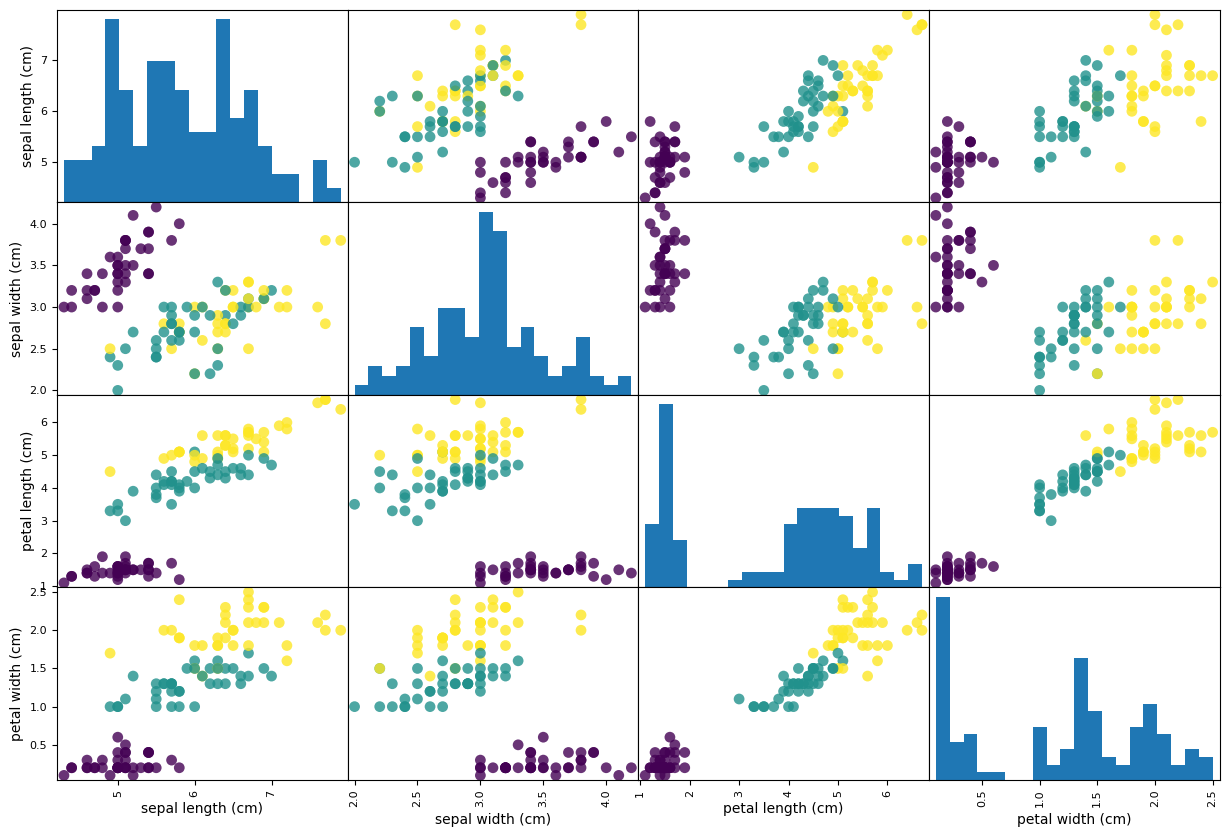

In [264]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 10), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)

## Building a K Nearest Neighbors Classifier

We are going to import the `KNeighborsClassifier` from sklearn. This implements the K-Nearest Neighbors algorithm which searches the dimension space for other items and looks at the label on those items. By labeling an unknown item based on a given number of near neighbors, we can estimate the label for our unknown.

We will start with one neighbor, but we can adjust this later and see how it affects our accuracy.

In [265]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50
                           )

Training is as simple as fitting our `knn` instance to the data in our training set. 

In [266]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

Now that we have fit a model to our training set, we can make a prediction for a new item. Let's input a set of measurements (as an array) that might represent an iris that we found. 

We can feed this new array to the `knn.predict()` method to examine its nearest neighbor and report the expected class based on our new data. 

In [267]:
X_new = np.array([[4.5, 3, 1.1, 0.5]])
print("X_new.shape {}".format(X_new.shape))

X_new.shape (1, 4)


In [268]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


We can see that it predicts the class with label 0, which is the species *setosa*. 

So, this seems to be functioning as we expect, we could test single sets of measurements, but we can also run predictions over our entire test set which we created above.

The code below reports each of the prediction classes for each set of measurements in our testing data set.

In [269]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [0 0 0 2 2 0 2 2 0 0 0 1 2 0 2 1 2 0 1 2 1 2 1 2 1 1 2 1 2 1 0 0 2 1 0 1 1
 0]


In [270]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.95


In [271]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.95


What if we wanted to run over various hyperparameters for the number of neighbors. 

We can write a simple training loop that reports the score for each value of `n_neigbors`. 

In [272]:
test_scores = []
k=1
while k < 110:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    test_scores.append((k,score))
    k += 1

print(test_scores)

[(1, 0.9736842105263158), (2, 0.9736842105263158), (3, 0.9736842105263158), (4, 1.0), (5, 1.0), (6, 1.0), (7, 0.9736842105263158), (8, 0.9736842105263158), (9, 0.9736842105263158), (10, 0.9473684210526315), (11, 0.9736842105263158), (12, 0.9736842105263158), (13, 0.9736842105263158), (14, 0.9736842105263158), (15, 0.9736842105263158), (16, 0.9736842105263158), (17, 0.9736842105263158), (18, 0.9736842105263158), (19, 0.9736842105263158), (20, 0.9736842105263158), (21, 0.9736842105263158), (22, 0.9736842105263158), (23, 0.9736842105263158), (24, 0.9736842105263158), (25, 0.9736842105263158), (26, 0.9473684210526315), (27, 0.9473684210526315), (28, 0.9736842105263158), (29, 0.9736842105263158), (30, 0.9736842105263158), (31, 1.0), (32, 0.9736842105263158), (33, 0.9736842105263158), (34, 0.9736842105263158), (35, 0.9736842105263158), (36, 0.9736842105263158), (37, 0.9736842105263158), (38, 1.0), (39, 0.9736842105263158), (40, 0.9736842105263158), (41, 0.9736842105263158), (42, 0.9736842105

We can graph this list of points with matplotlib scatter plot.

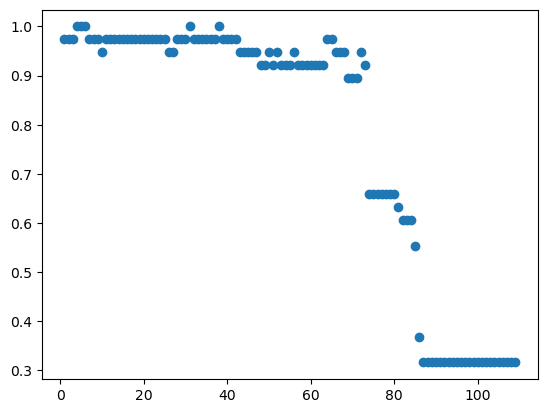

In [273]:
from matplotlib import pyplot as plt

x_val=[s[0] for s in test_scores]
y_val=[s[1] for s in test_scores]

plt.scatter(x_val, y_val)
plt.show()

As can be seen from the list of points and the graph above, our best performance is about 97%. 

After we begin to include more than about 20 neighbors, we see a decline in performance. 

This makes sense because when we look at more neighbors, we are likely to begin to see more that are not in the correct class. That is, we are looking farther away, so our estimates will not be as good.
